### Example of using gym - I have used the Taxi-v3 environment to illustrate ###
https://gymnasium.farama.org/environments/toy_text/taxi/#rewards


- This an an environment called Taxi-v3, where the objective is to have a self driving taxi pick up and drop passengers from / to specific locations.
- There are observations one can get and actions one can take in the environment.

Rewards

    -1 per step unless other reward is triggered.

    +20 delivering passenger.

    -10 executing “pickup” and “drop-off” actions illegally.

An action that results a noop, like moving into a wall, will incur the time step penalty. Noops can be avoided by sampling the action_mask returned in info.


Episode End

The episode ends if the following happens:

    Termination: 1. The taxi drops off the passenger.

    Truncation (when using the time_limit wrapper): 1. The length of the episode is 200.




In [1]:
import gymnasium as gym
from matplotlib import pyplot as plt

# Setting up an environment

env = gym.make("Taxi-v3", render_mode = "rgb_array" ) #"human"


In [2]:
# Observation and action space

print(f"Action Space: {env.action_space}")
print(f"State Space: {env.observation_space}")

print(f"Observation Space sample: {env.observation_space.sample()}")
print(f"Action Space sample: {env.action_space.sample()}")

# This tells us how many actions and spaces are there.
# It also tells us that action and states are discrete

Action Space: Discrete(6)
State Space: Discrete(500)
Observation Space sample: 172
Action Space sample: 3


<frozen importlib._bootstrap>:241: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


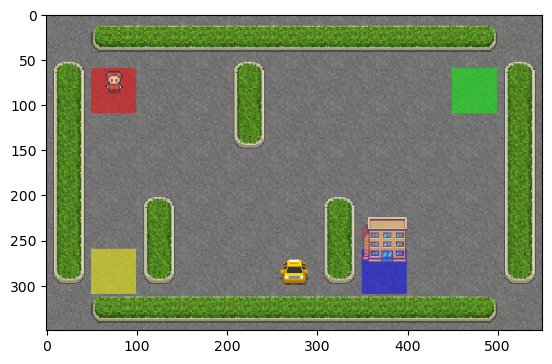

In [3]:
# Reset environment to a new, random state
# This environment lends itself to easy rendering in the notebook
#Import and get a visualization of the environment


env.reset()

# env.render()

# env.close()

plt.imshow(env.render())
plt.show()

State: 328


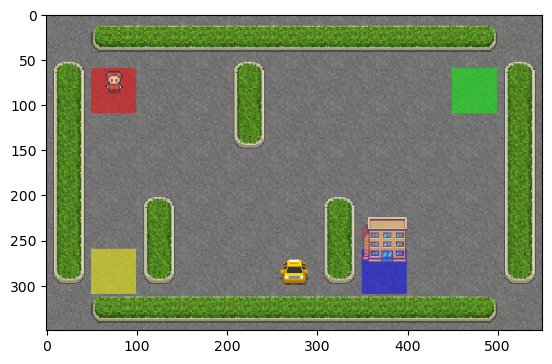

In [4]:
# Let us look at a particular state by actually feeding some values in manually

state = env.unwrapped.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

plt.imshow(env.render())
plt.show()


In [5]:
# When an action is taken we get back next state -s',reward -r, episode - done(true or false) and other information
print(env.reset())
env.step(1)
env.close()

(67, {'prob': 1.0, 'action_mask': array([1, 0, 1, 1, 0, 0], dtype=int8)})


#### Let us run a full episode - Start till episode terminates

In [6]:

env = gym.make("Taxi-v3", render_mode = "rgb_array" ) # Create the environment
env.reset()                                           # Reset it to a start state
timesteps = 0                                         # Storage to see how many time steps were taken
penalties, reward = 0, 0                              # Store the total times a peanlty was got, reward accumulated   

frames = []                                           # Since we said "rgb_array" mode, we can capture each timestep as a frame for animation

done = False                                          # Set a flag for episode is done

while not done:
    action = env.action_space.sample()
    state, reward, done, info,_ = env.step(action)     # Take an action and collect s', r, episode status, ..

    if reward == -10:                                  # Check reward received
        penalties += 1                                 # Negative reward is a penalty
    
    # Put each timestep frame into a dict for animation later
    frames.append({
        'frame': env.render(),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    timesteps += 1                                       # next time step starts
    
    
print(f"Timesteps taken: {timesteps}")
print(f"Penalties incurred: {penalties}")


Timesteps taken: 2071
Penalties incurred: 679


Timestep: 285
State: 281
Action: 4
Reward: -10


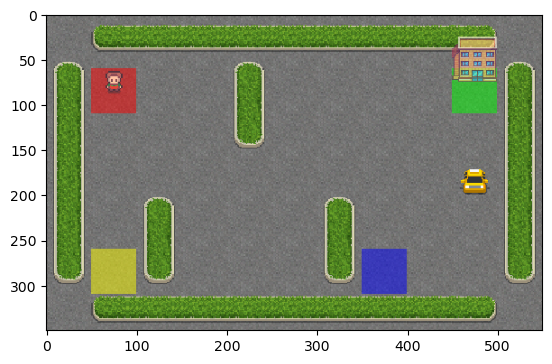

KeyboardInterrupt: 

In [7]:
# Display the whole animation by running the frames stored

from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        #print(frame['frame'])
        
        plt.imshow(frames[i]['frame'])
        plt.show()
      
        
        sleep(0.05)   # Build a time lag between each frame to see the movement
        
print_frames(frames)


Not good. Our agent takes thousands of timesteps and makes lots of wrong drop offs to deliver just one passenger to the right destination.

This is because we aren't learning from past experience. We can run this over and over, and it will never optimize. The agent has no memory of which action was best for each state, which is exactly what Reinforcement Learning will do for us.